# datatset 불러오기

자료 출처 : https://www.datamanim.com/intro.html

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv',index_col=0)

## data 탐색

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [2]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# scatter plot 그리기

In [5]:
import matplotlib.pyplot as plt

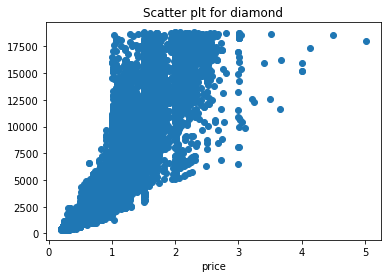

In [9]:
plt.figsize=(20,15)
plt.title("Scatter plt for diamond")
plt.xlabel("carat")
plt.xlabel("price")
plt.scatter(df['carat'],df['price'])
plt.show()

# 상관계수 구하기

In [10]:
corr_by_pandas_for_price=df.corr()

In [11]:
corr_by_pandas_for_price

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


## carat vs price

In [17]:
corr_by_pandas_for_price.loc["carat","price"]

0.9215913011935697

## heatmap 그리기

In [12]:
import seaborn as sns

<AxesSubplot:>

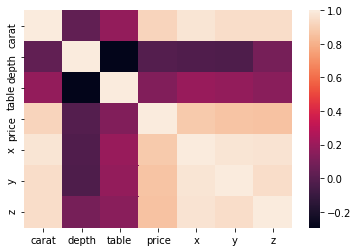

In [13]:
sns.heatmap(corr_by_pandas_for_price)

## 상관계수의 p-value

In [18]:
from scipy import stats

In [19]:
corr_by_scipy,pv=stats.pearsonr(df['carat'],df['price'])

In [20]:
corr_by_scipy,pv

(0.9215913011934769, 0.0)

# color 별 값의 분포 구하기

<AxesSubplot:xlabel='color', ylabel='price'>

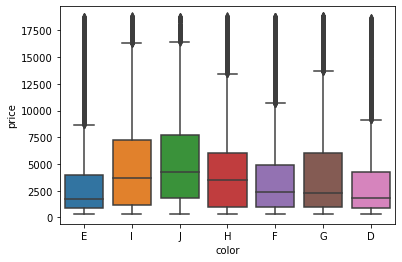

In [21]:
sns.boxplot(data=df,x='color',y='price')

Diamond의 평균가격은 3932로 알려져있다. ‘H’ color를 가지는 다이아몬드 집단의 평균에 대한 일표본 t검정을 시행하려한다. 통계량과 pvalue값을 구하시오. 유의수준 0.05에서 귀무가설 채택여부를 boolean 값으로 표현할 변수(hypo) 만들고 출력하시오</quote>

In [22]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## color H 분리하기

In [23]:
H_color=df[df['color']=="H"]
H_color.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8304 entries, 8 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    8304 non-null   float64
 1   cut      8304 non-null   object 
 2   color    8304 non-null   object 
 3   clarity  8304 non-null   object 
 4   depth    8304 non-null   float64
 5   table    8304 non-null   float64
 6   price    8304 non-null   int64  
 7   x        8304 non-null   float64
 8   y        8304 non-null   float64
 9   z        8304 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 713.6+ KB


## 통계량 구하기

In [24]:
static,pv= stats.ttest_1samp(H_color['price'],3932)

In [26]:
static,pv

(11.988997411117696, 7.569973305218302e-33)

In [27]:
if pv<0.05:
    hypo=False
else:
    hypo=True

In [28]:
hypo

False

# 분산 검정

그래프상에서 ‘F’와 ‘G’는 평균이 유사해보인다.
이를 확인하기 위해 집단간 등분산(levene,fligner,bartlett) 검정을 시행 후
결과를 출력하고조건에 맞는 독립표본 t검정을 시행하라

## color 계산하기

In [32]:
F_color=df[df['color']=="F"]
F_color.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 13 to 53932
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    9542 non-null   float64
 1   cut      9542 non-null   object 
 2   color    9542 non-null   object 
 3   clarity  9542 non-null   object 
 4   depth    9542 non-null   float64
 5   table    9542 non-null   float64
 6   price    9542 non-null   int64  
 7   x        9542 non-null   float64
 8   y        9542 non-null   float64
 9   z        9542 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 820.0+ KB


In [33]:
G_color=df[df['color']=="G"]
G_color.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11292 entries, 26 to 53930
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    11292 non-null  float64
 1   cut      11292 non-null  object 
 2   color    11292 non-null  object 
 3   clarity  11292 non-null  object 
 4   depth    11292 non-null  float64
 5   table    11292 non-null  float64
 6   price    11292 non-null  int64  
 7   x        11292 non-null  float64
 8   y        11292 non-null  float64
 9   z        11292 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 970.4+ KB


## 등분산성 검정

In [36]:
leve= stats.levene(F_color['price'],G_color['price'])
leve_stat,leve_pv=leve

In [38]:
leve_stat,leve_pv

(53.627886257416655, 2.511093007074788e-13)

In [41]:
fli= stats.levene(F_color['price'],G_color['price'])
fli_stat,fli_pv=fli

In [42]:
fli_stat,fli_pv

(53.627886257416655, 2.511093007074788e-13)

In [43]:
barlet= stats.levene(F_color['price'],G_color['price'])
barlet_stat,barlet_pv=barlet

In [44]:
barlet_stat,barlet_pv

(53.627886257416655, 2.511093007074788e-13)

### Color "F"와 "G"는 같지 않다 그러므로 독립검정 (이분산성 가정)

In [47]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.
    
   

In [48]:
t_test_F_G=stats.ttest_ind(F_color['price'],G_color['price'],equal_var=False)

In [49]:
t_test_F_G

Ttest_indResult(statistic=-5.045279980436125, pvalue=4.5670321227041464e-07)

# 이상치 검출

연속형 변수(carat,depth,table,price,x,y,z) 각각의 이상치(1,3분위값에서 IQR*1.5 외의 값) 갯수를 데이터 프레임(변수명 ratio_df, 비율의 내림차순 정렬)으로 아래와 같이 나타내어라.

## list 작성

In [53]:
lst_outlier=[]
colnames=['carat','depth','table','price',"x","y","z"]
for col in colnames:
    target=df[col]
    # 이상치 : 1분위,3분위에서 1.5 iqr만큼 떨어진 값 (iqr = 3분위-1분위)
    iqr=target.quantile(0.75)-target.quantile(0.25)
    outlier=target.loc[(target>target.quantile(0.75)+1.5*iqr)|(target<target.quantile(0.25)-1.5*iqr)]
    lst_outlier.append([col,len(outlier)])
    

## list 생성 결과

In [54]:
lst_outlier

[['carat', 1889],
 ['depth', 2545],
 ['table', 605],
 ['price', 3540],
 ['x', 32],
 ['y', 29],
 ['z', 49]]

## data frame으로 변환

In [55]:
ratio_df=pd.DataFrame(lst_outlier).rename(columns={0:'column',1:'ratio'}).sort_values('ratio',ascending=False)
ratio_df

,column,ratio
3,price,3540
1,depth,2545
0,carat,1889
2,table,605
6,z,49
4,x,32
5,y,29


# color별 min,max,평균 저장

In [74]:
df.groupby(['color']).count()

,carat,cut,clarity,depth,table,price,x,y,z
color,,,,,,,,,
D,6775,6775,6775,6775,6775,6775,6775,6775,6775
E,9797,9797,9797,9797,9797,9797,9797,9797,9797
F,9542,9542,9542,9542,9542,9542,9542,9542,9542
G,11292,11292,11292,11292,11292,11292,11292,11292,11292
H,8304,8304,8304,8304,8304,8304,8304,8304,8304
I,5422,5422,5422,5422,5422,5422,5422,5422,5422
J,2808,2808,2808,2808,2808,2808,2808,2808,2808


In [72]:
df.groupby(['color']).sum()

,carat,depth,table,price,x,y,z
color,,,,,,,
D,4456.56,418004.8,388916.1,21476439,36700.52,36728.14,22647.65
E,6445.12,604103.5,563241.3,30142944,53017.25,53090.23,32728.73
F,7028.05,588689.7,548030.8,35542866,53577.96,53620.85,33057.74
G,8708.28,697361.3,646903.2,45158240,64110.82,64140.73,39578.70
H,7571.58,513493.2,477627.9,37257301,49685.61,49697.90,30691.29
I,5568.00,335331.1,312184.0,27608146,33740.16,33739.64,20849.82
J,3263.28,173779.3,162337.2,14949281,18306.30,18302.84,11325.37


In [69]:
df.groupby(['color']).mean()

,carat,depth,table,price,x,y,z
color,,,,,,,
D,0.657795,61.698125,57.404590,3169.954096,5.417051,5.421128,3.342827
E,0.657867,61.662090,57.491201,3076.752475,5.411580,5.419029,3.340689
F,0.736538,61.694582,57.433536,3724.886397,5.614961,5.619456,3.464446
G,0.771190,61.757111,57.288629,3999.135671,5.677543,5.680192,3.505021
H,0.911799,61.836850,57.517811,4486.669196,5.983335,5.984815,3.695965
I,1.026927,61.846385,57.577278,5091.874954,6.222826,6.222730,3.845411
J,1.162137,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251


In [66]:
colorDf=df.groupby(['color'])['price'].agg(['min','max','mean'])

In [67]:
colorDf

,min,max,mean
color,,,
D,357,18693,3169.954096
E,326,18731,3076.752475
F,342,18791,3724.886397
G,354,18818,3999.135671
H,337,18803,4486.669196
I,334,18823,5091.874954
J,335,18710,5323.818020


In [76]:
# agg(['min','max','mean']))

# color에 Label 부여

## groupby + size 이용

In [80]:
df.groupby(['color']).size()

color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
dtype: int64

In [91]:
df_colors=df.groupby(['color']).size().sort_values()

In [93]:
df_colors=pd.DataFrame(df_colors)
df_colors.

,0
color,
J,2808
I,5422
D,6775
H,8304
F,9542
E,9797
G,11292


In [97]:
list(df.groupby('color').size().sort_values().index)

['J', 'I', 'D', 'H', 'F', 'E', 'G']

In [98]:
enumerate(list(df.groupby('color').size().sort_values().index))

## enumerate 활용

In [101]:
for i, x in enumerate(list(df.groupby('color').size().sort_values().index)):
    print(i+1,x)

1 J
2 I
3 D
4 H
5 F
6 E
7 G


In [111]:
# dic= {x: "{0:03d}".format(i+1) for i, x in enumerate(list(df.groupby('color').size().sort_values().index))}
dic= {x: i+1 for i, x in enumerate(list(df.groupby('color').size().sort_values().index))}

dic

{'J': 1, 'I': 2, 'D': 3, 'H': 4, 'F': 5, 'E': 6, 'G': 7}

In [115]:
dic["J"]

1

In [112]:
df['colorLabel'] = df['color'].map(lambda x: dic[x])
df

,carat,cut,color,clarity,depth,table,price,x,y,z,colorLabel
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,6
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,6
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,6
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1
...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4


## apply 활용

In [89]:
def colorLabel(x):
    num=""
    if x=="J":
        num=1
    elif x=="I":
        num=2
    elif x=="D":
        num=2
    elif x=="H":
        num=3
    elif x=="F":
        num=4
    elif x=="E":
        num=5
    elif x=="G":
        num=6
    return num
        

In [90]:
df['colorLabel']=df['color'].apply(colorLabel)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,colorLabel
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


In [86]:
# df.groupby(['cut']).size().sort_values()

# cut 종류별 평균

In [121]:
pd.options.display.float_format = '{:.2f}'.format
# print(type(df.groupby(['cut'])['price'].mean()))
df.groupby(['cut'])[['price']].mean()


,price
cut,
Fair,4358.76
Good,3928.86
Ideal,3457.54
Premium,4584.26
Very Good,3981.76


In [159]:
df['priceLabel']=df['price'].map(lambda x: x//1000)
# df[['priceLabel']].value_counts()
labelCount=df[['priceLabel']].value_counts().reset_index().rename(columns={0:"counts"})




In [160]:

labelCount

,priceLabel,counts
0,0,14499
1,1,9704
2,2,6131
3,4,4653
4,3,4226
5,5,3174
6,6,2278
7,7,1669
8,8,1307
9,9,1076
